<a href="https://colab.research.google.com/github/mchirico/COVID-19/blob/master/COVID_19.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**COVID-19**

Note:  You need to make a copy of this note book, if you want to run it yourself
by clicking on "File/Save a copy in Drive"



Sharable link:
https://colab.research.google.com/drive/1RZXskxLFGTMcw7Q88VwIWk7vSceGbIkf?usp=sharing








Data From: 
[JHU CSSE](https://github.com/CSSEGISandData/COVID-19)



In [0]:
import requests
import pandas as pd
import numpy as np 
from datetime import datetime



import warnings
warnings.filterwarnings("ignore")

try:
  import seaborn as sns
  import matplotlib.pyplot as plt
  import matplotlib.dates as mdates
  sns.set(style="white", color_codes=True)
  from matplotlib_venn import venn2
  import pydot
  import libarchive
  import torch
except:
  print("Will try to install software")
  # Lines below .... Only need to be run once at the top of the notebook.
  !pip install -q matplotlib-venn
  # #   https://pypi.python.org/pypi/pydot
  !apt-get -qq install -y graphviz && pip install -q pydot
  !apt-get -qq install -y libarchive-dev && pip install -q -U libarchive
  !pip install -U -q PyDrive
  !pip install --upgrade -q gspread
  
  !pip install torchvision
  
  import seaborn as sns
  import matplotlib.pyplot as plt
  import matplotlib.dates as mdates
  sns.set(style="white", color_codes=True)
  from matplotlib_venn import venn2
  import pydot
  import libarchive





In [0]:
TMP = '/tmp/data'

from io import BytesIO
from urllib.request import urlopen
from zipfile import ZipFile
zipurl = 'https://ihmecovid19storage.blob.core.windows.net/latest/ihme-covid19.zip'
with urlopen(zipurl) as zipresp:
    with ZipFile(BytesIO(zipresp.read())) as zfile:
        zfile.extractall(TMP)

In [36]:
file = !find  /tmp/data -iname '*.csv'
sdate = file[0][len(TMP)+1: len(TMP)+11]
startDate = datetime.strptime(sdate,'%Y_%m_%d')
startDate

datetime.datetime(2020, 5, 10, 0, 0)

In [37]:
p=pd.read_csv(file[0])
p[p['confirmed_infections'] >= 20].head()


,V1,location_name,date,allbed_mean,allbed_lower,allbed_upper,ICUbed_mean,ICUbed_lower,ICUbed_upper,InvVen_mean,InvVen_lower,InvVen_upper,deaths_mean,deaths_lower,deaths_upper,admis_mean,admis_lower,admis_upper,newICU_mean,newICU_lower,newICU_upper,totdea_mean,totdea_lower,totdea_upper,bedover_mean,bedover_lower,bedover_upper,icuover_mean,icuover_lower,icuover_upper,deaths_mean_smoothed,deaths_lower_smoothed,deaths_upper_smoothed,totdea_mean_smoothed,totdea_lower_smoothed,totdea_upper_smoothed,mobility_data_type,mobility_composite,total_tests_data_type,total_tests,confirmed_infections,est_infections_mean,est_infections_lower,est_infections_upper
86,87,Abruzzo,2020-03-13,29.2308,25.59875,33.90125,8.70435,8.35000,9.15,8.51655,8.20000,8.90,0.0,0.0,0.0,7.33480,5.75000,9.80000,2.23375,2.05,2.50,2.0,2.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,observed,-52.948603,observed,232.285689,20.131392,826.189550,745.971691,972.042365
87,88,Abruzzo,2020-03-14,39.2533,34.90000,44.70375,10.94060,10.50000,11.45,10.69065,10.34875,11.10,0.0,0.0,0.0,11.02250,8.90000,14.05000,3.23625,3.05,3.50,2.0,2.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,2.0,2.0,2.0,observed,-57.046048,observed,240.142831,24.836706,823.524194,729.045519,963.999803
88,89,Abruzzo,2020-03-15,50.4921,45.45000,56.30000,14.40890,13.90000,15.00,14.03620,13.60000,14.55,1.0,1.0,1.0,14.67725,12.10000,18.00000,4.46830,4.15,4.85,3.0,3.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,3.0,3.0,3.0,observed,-60.807399,observed,247.999973,30.383177,802.848340,681.599177,938.981127
89,90,Abruzzo,2020-03-16,65.4203,59.15000,71.85000,18.88345,18.29875,19.55,18.38590,17.90000,18.95,1.0,1.0,1.0,18.32120,15.44875,21.75000,5.47455,5.20,5.85,4.0,4.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,4.0,4.0,4.0,observed,-64.197910,observed,255.857115,37.072555,768.629183,638.829697,922.787529
90,91,Abruzzo,2020-03-17,83.9820,76.79750,91.50000,24.59685,23.85000,25.45,23.91260,23.30000,24.60,2.0,2.0,2.0,21.99235,18.80000,26.05125,6.71340,6.35,7.20,6.0,6.0,6.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,2.0,2.0,6.0,6.0,6.0,observed,-67.202367,observed,263.714257,44.985402,728.341945,607.858866,880.246094


In [38]:
p2=pd.read_csv(file[1])
#p[p['confirmed_infections'] >= 20].head()
p2.head()


,location_name,peak_bed_day_mean,peak_bed_day_lower,peak_bed_day_upper,peak_icu_bed_day_mean,peak_icu_bed_day_lower,peak_icu_bed_day_upper,peak_vent_day_mean,peak_vent_day_lower,peak_vent_day_upper,all_bed_capacity,icu_bed_capacity,all_bed_usage,icu_bed_usage,available_all_nbr,available_icu_nbr,travel_limit_start_date,travel_limit_end_date,stay_home_start_date,stay_home_end_date,educational_fac_start_date,educational_fac_end_date,any_gathering_restrict_start_date,any_gathering_restrict_end_date,any_business_start_date,any_business_end_date,all_non-ess_business_start_date,all_non-ess_business_end_date
0,Abruzzo,2020-03-30,2020-03-29,2020-03-31,2020-03-30,2020-03-29,2020-03-31,2020-03-30,2020-03-29,2020-03-30,4270.0,153.0,3322.0,112.0,948.0,41.0,2020-03-22,2020-05-04,2020-03-11,NaN,2020-03-05,NaN,2020-03-11,NaN,2020-03-11,NaN,2020-03-11,2020-04-14
1,Alabama,2020-05-10,2020-05-06,2020-05-13,2020-05-09,2020-05-06,2020-05-13,2020-05-09,2020-05-06,2020-05-13,17537.0,1525.0,11793.0,1050.0,5744.0,475.0,NaN,NaN,2020-04-04,2020-04-30,2020-03-19,NaN,2020-03-19,NaN,2020-03-19,NaN,2020-03-28,2020-04-30
2,Alaska,2020-04-02,2020-04-02,2020-04-02,2020-04-04,2020-04-04,2020-04-04,2020-04-04,2020-04-04,2020-04-04,2034.0,169.0,1351.0,115.0,683.0,54.0,2020-03-28,2020-04-24,2020-03-28,2020-04-24,2020-03-16,NaN,2020-03-24,NaN,2020-03-17,NaN,2020-03-28,2020-04-24
3,Alberta,2020-05-04,2020-05-02,2020-06-04,2020-05-04,2020-05-02,2020-06-06,2020-05-04,2020-05-02,2020-06-05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020-03-16,NaN,2020-03-12,NaN,2020-03-18,NaN,NaN,NaN
4,Amazonas,2020-05-22,2020-05-06,2020-05-29,2020-05-23,2020-05-08,2020-05-31,2020-05-22,2020-05-08,2020-05-29,4747.0,276.0,3721.0,236.0,1026.0,40.0,NaN,NaN,NaN,NaN,2020-03-16,NaN,2020-03-31,NaN,2020-03-19,NaN,2020-03-24,NaN


## Mobility Data




In [93]:
# Apple - needs to be updated 
#.   from: https://www.apple.com/covid19/mobility
url = 'https://storage.googleapis.com/montco-stats/applemobilitytrends.csv'
apple=pd.read_csv(url)
apple.head()

,geo_type,region,transportation_type,alternative_name,sub-region,country,2020-01-13,2020-01-14,2020-01-15,2020-01-16,2020-01-17,2020-01-18,2020-01-19,2020-01-20,2020-01-21,2020-01-22,2020-01-23,2020-01-24,2020-01-25,2020-01-26,2020-01-27,2020-01-28,2020-01-29,2020-01-30,2020-01-31,2020-02-01,2020-02-02,2020-02-03,2020-02-04,2020-02-05,2020-02-06,2020-02-07,2020-02-08,2020-02-09,2020-02-10,2020-02-11,2020-02-12,2020-02-13,2020-02-14,2020-02-15,...,2020-04-08,2020-04-09,2020-04-10,2020-04-11,2020-04-12,2020-04-13,2020-04-14,2020-04-15,2020-04-16,2020-04-17,2020-04-18,2020-04-19,2020-04-20,2020-04-21,2020-04-22,2020-04-23,2020-04-24,2020-04-25,2020-04-26,2020-04-27,2020-04-28,2020-04-29,2020-04-30,2020-05-01,2020-05-02,2020-05-03,2020-05-04,2020-05-05,2020-05-06,2020-05-07,2020-05-08,2020-05-09,2020-05-10,2020-05-11,2020-05-12,2020-05-13,2020-05-14,2020-05-15,2020-05-16,2020-05-17
0,country/region,Albania,driving,NaN,NaN,NaN,100.0,95.30,101.43,97.20,103.55,112.67,104.83,94.39,94.07,93.51,92.94,102.13,102.38,101.41,94.62,89.12,90.17,90.21,97.71,102.50,108.92,92.82,91.48,93.99,96.72,102.46,103.29,107.83,87.99,94.18,94.62,99.70,139.30,123.90,...,26.43,26.70,26.32,25.47,24.89,32.64,31.43,30.67,30.00,29.26,22.94,24.55,31.51,33.59,31.69,33.94,30.22,25.22,30.39,37.39,36.69,35.90,38.09,37.23,29.36,36.00,43.69,42.61,43.11,46.13,45.78,41.59,45.39,NaN,NaN,49.19,50.20,48.30,46.78,45.51
1,country/region,Albania,walking,NaN,NaN,NaN,100.0,100.68,98.93,98.46,100.85,100.13,82.13,95.65,97.78,95.39,94.24,93.73,97.06,77.27,83.37,82.73,84.39,88.19,90.79,88.70,79.32,87.12,88.06,99.40,85.84,94.63,99.74,81.41,90.19,90.45,94.16,95.69,109.21,108.40,...,29.81,28.96,27.29,27.63,29.59,35.52,38.08,35.48,39.15,34.58,27.76,27.93,36.72,34.46,35.39,34.80,34.63,29.00,35.22,41.83,37.53,41.49,38.25,38.68,32.28,43.41,49.59,46.44,52.84,52.37,48.10,44.86,68.87,NaN,NaN,61.79,56.46,54.41,48.36,45.20
2,country/region,Argentina,driving,NaN,NaN,NaN,100.0,97.07,102.45,111.21,118.45,124.01,95.44,95.13,95.42,97.66,99.42,113.34,118.23,91.31,93.37,91.12,92.35,96.74,111.24,123.96,89.01,91.66,89.18,94.49,95.98,111.12,121.53,89.23,96.42,96.97,101.68,104.90,122.91,127.62,...,19.95,19.80,16.80,19.40,12.89,21.10,22.29,23.55,24.40,27.17,23.19,14.54,26.67,27.25,27.61,28.73,30.99,25.92,16.57,27.45,27.12,32.22,34.45,22.69,28.23,16.44,32.01,33.63,35.13,35.56,40.25,33.82,19.82,NaN,NaN,38.87,41.01,44.34,38.29,22.01
3,country/region,Argentina,walking,NaN,NaN,NaN,100.0,95.11,101.37,112.67,116.72,114.14,84.54,101.37,106.12,104.91,102.56,104.88,98.83,73.64,94.27,93.86,92.20,96.00,98.99,97.42,67.21,95.18,96.25,100.39,99.10,105.00,106.45,73.12,104.20,105.87,111.47,113.20,128.75,103.47,...,15.51,14.65,13.58,15.75,10.45,16.35,16.66,17.42,18.18,18.80,17.03,10.59,18.44,19.01,18.47,20.39,22.32,23.31,16.36,18.48,17.49,22.78,24.80,16.62,20.61,12.44,21.35,22.63,23.84,23.84,30.63,24.84,15.58,NaN,NaN,28.33,28.44,31.63,28.81,18.49
4,country/region,Australia,driving,AU,NaN,NaN,100.0,102.98,104.21,108.63,109.08,89.00,99.35,103.53,106.80,107.40,115.65,109.66,88.59,85.18,95.91,99.40,99.92,103.04,103.73,85.73,93.39,95.83,98.63,102.40,107.46,106.55,86.33,98.78,100.08,103.28,106.19,116.62,115.36,93.51,...,59.24,33.19,36.00,26.95,31.72,53.14,55.91,56.56,58.77,47.51,36.90,53.34,56.93,58.06,59.69,62.87,47.84,41.89,55.39,59.09,59.46,59.46,63.12,58.40,48.67,58.18,62.51,64.04,66.19,71.34,67.64,50.96,63.56,NaN,NaN,71.12,77.24,79.75,65.88,72.17


In [98]:
montco = apple[(apple['region']=='Montgomery County') & (apple['sub-region']=='Pennsylvania')]
n=pd.melt(montco, id_vars=['region'], value_vars=mobility.columns[5::])
n.columns = ['region', 'timeStamp', 'value']
n['timeStamp'] = n['timeStamp'].apply(lambda x: datetime.strptime(x,'%Y-%m-%d'))
n.head()

,region,timeStamp,value
0,Montgomery County,2020-03-01,90.29
1,Montgomery County,2020-03-02,102.39
2,Montgomery County,2020-03-03,106.62
3,Montgomery County,2020-03-04,110.10
4,Montgomery County,2020-03-05,113.70


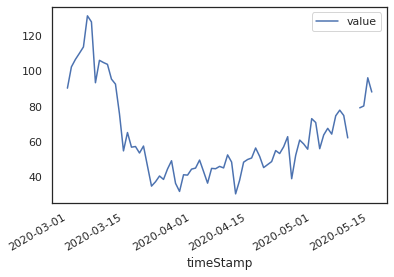

In [99]:
n.plot.line(x='timeStamp',y='value');

## DescartesLabs
Data for Mobility Changes in Response to COVID-19
https://github.com/descarteslabs/DL-COVID-19

In [63]:
url = 'https://github.com/descarteslabs/DL-COVID-19/raw/master/DL-us-m50.csv'
mobility=pd.read_csv(url)
mobility.head()

,country_code,admin_level,admin1,admin2,fips,2020-03-01,2020-03-02,2020-03-03,2020-03-04,2020-03-05,2020-03-06,2020-03-07,2020-03-08,2020-03-09,2020-03-10,2020-03-11,2020-03-12,2020-03-13,2020-03-14,2020-03-15,2020-03-16,2020-03-17,2020-03-18,2020-03-19,2020-03-20,2020-03-21,2020-03-22,2020-03-23,2020-03-24,2020-03-25,2020-03-26,2020-03-27,2020-03-28,2020-03-29,2020-03-30,2020-03-31,2020-04-01,2020-04-02,2020-04-03,2020-04-04,...,2020-04-06,2020-04-07,2020-04-08,2020-04-09,2020-04-10,2020-04-11,2020-04-12,2020-04-13,2020-04-14,2020-04-15,2020-04-16,2020-04-17,2020-04-18,2020-04-19,2020-04-21,2020-04-22,2020-04-23,2020-04-24,2020-04-25,2020-04-26,2020-04-27,2020-04-28,2020-04-29,2020-04-30,2020-05-01,2020-05-02,2020-05-03,2020-05-04,2020-05-05,2020-05-06,2020-05-07,2020-05-08,2020-05-09,2020-05-10,2020-05-11,2020-05-12,2020-05-13,2020-05-14,2020-05-15,2020-05-16
0,US,1,Alabama,NaN,1.0,8.331,10.398,10.538,10.144,10.982,13.024,11.373,8.513,10.901,10.892,10.954,11.755,12.269,9.379,6.384,9.490,8.263,7.662,7.863,8.325,5.233,2.903,5.398,5.519,6.305,6.363,6.956,4.772,2.739,5.148,4.490,5.619,5.876,6.624,4.241,...,4.476,4.326,4.519,5.287,6.140,4.705,0.076,5.278,5.441,5.958,6.255,7.167,5.253,0.523,6.577,6.623,4.972,7.584,5.287,3.543,6.562,6.961,6.012,8.114,9.946,7.787,6.562,8.030,8.695,10.192,9.170,9.015,8.331,7.116,8.113,9.253,8.275,8.451,9.478,8.529
1,US,2,Alabama,Autauga County,1001.0,7.194,14.587,13.865,13.880,14.659,17.066,11.562,8.510,15.882,14.429,14.484,15.707,15.103,8.297,5.488,11.726,10.317,9.624,8.482,9.838,4.694,2.271,6.438,7.030,6.912,6.731,7.601,4.540,2.633,5.896,5.196,6.278,6.230,7.470,4.006,...,5.216,4.851,4.792,5.662,6.283,4.901,0.209,6.356,5.348,6.241,6.668,8.193,5.079,0.060,7.013,6.738,5.146,7.730,5.138,3.726,7.453,7.694,5.920,7.977,11.106,6.922,5.568,8.019,10.593,11.105,11.257,11.474,7.704,5.914,8.067,9.676,9.847,9.427,10.582,7.993
2,US,2,Alabama,Baldwin County,1003.0,9.780,12.042,11.481,10.879,12.381,13.789,11.481,9.971,11.566,11.936,12.102,12.588,13.547,10.871,9.601,9.538,8.747,8.510,8.580,11.389,6.710,4.281,6.645,6.422,6.630,6.618,7.402,5.500,3.148,5.241,4.999,6.054,5.954,6.758,4.392,...,4.484,4.726,5.042,5.588,6.252,4.806,0.126,5.877,5.934,6.382,6.421,6.938,5.206,2.020,7.040,7.158,4.427,8.429,6.530,5.015,7.190,7.500,6.199,8.284,9.638,8.173,9.260,8.697,8.972,10.556,9.168,9.892,8.489,10.123,8.952,9.384,8.530,8.373,9.045,9.158
3,US,2,Alabama,Barbour County,1005.0,8.348,10.004,9.267,6.517,8.247,11.002,13.146,7.382,9.166,8.668,9.596,11.567,11.258,9.522,5.416,9.632,8.556,7.252,7.009,7.459,6.228,3.624,6.060,6.743,6.645,7.015,7.994,5.284,4.850,6.412,5.479,5.840,5.495,6.155,5.184,...,4.763,4.406,4.388,5.946,7.476,4.159,1.215,4.716,4.762,5.049,5.833,6.300,5.421,0.665,6.662,7.302,4.647,7.358,6.100,4.848,6.513,8.080,5.889,8.377,10.412,8.561,7.645,8.298,10.742,9.129,9.204,8.352,9.165,6.524,7.911,8.506,8.050,7.912,11.114,8.650
4,US,2,Alabama,Bibb County,1007.0,13.008,23.076,24.164,22.768,26.944,32.374,27.175,12.452,29.973,24.206,27.877,26.126,29.176,17.004,13.342,16.496,17.370,19.282,18.225,18.496,6.752,3.581,8.878,12.335,13.569,11.518,13.157,8.580,4.140,10.346,9.363,10.754,10.873,14.236,7.384,...,8.849,7.141,10.532,9.952,13.361,7.243,0.760,10.603,12.359,12.150,13.478,13.482,10.920,0.991,14.424,12.939,8.542,18.094,8.804,5.499,14.712,14.728,9.465,13.356,17.084,11.018,9.173,14.064,14.789,19.972,19.894,17.752,14.541,10.360,15.391,16.502,17.109,14.124,17.356,14.106


In [76]:
t=mobility
t[(t['admin1']=='Pennsylvania') & (t['admin2']=='Montgomery County')]

,country_code,admin_level,admin1,admin2,fips,2020-03-01,2020-03-02,2020-03-03,2020-03-04,2020-03-05,2020-03-06,2020-03-07,2020-03-08,2020-03-09,2020-03-10,2020-03-11,2020-03-12,2020-03-13,2020-03-14,2020-03-15,2020-03-16,2020-03-17,2020-03-18,2020-03-19,2020-03-20,2020-03-21,2020-03-22,2020-03-23,2020-03-24,2020-03-25,2020-03-26,2020-03-27,2020-03-28,2020-03-29,2020-03-30,2020-03-31,2020-04-01,2020-04-02,2020-04-03,2020-04-04,...,2020-04-06,2020-04-07,2020-04-08,2020-04-09,2020-04-10,2020-04-11,2020-04-12,2020-04-13,2020-04-14,2020-04-15,2020-04-16,2020-04-17,2020-04-18,2020-04-19,2020-04-21,2020-04-22,2020-04-23,2020-04-24,2020-04-25,2020-04-26,2020-04-27,2020-04-28,2020-04-29,2020-04-30,2020-05-01,2020-05-02,2020-05-03,2020-05-04,2020-05-05,2020-05-06,2020-05-07,2020-05-08,2020-05-09,2020-05-10,2020-05-11,2020-05-12,2020-05-13,2020-05-14,2020-05-15,2020-05-16
1993,US,2,Pennsylvania,Montgomery County,42091.0,3.889,6.281,6.27,6.44,6.87,6.783,5.468,3.867,6.228,6.283,6.411,6.144,4.714,2.672,1.192,2.708,1.253,1.077,0.922,1.728,0.072,0.042,0.035,0.049,0.035,0.11,0.244,0.026,0.028,0.041,0.038,0.053,0.062,0.065,0.041,...,0.055,0.06,0.049,0.04,0.049,0.049,0.03,0.029,0.056,0.054,0.048,0.097,0.036,0.038,0.06,0.23,0.177,0.084,0.344,0.025,0.079,0.569,0.337,0.058,0.885,1.002,0.271,0.204,0.333,0.239,0.263,0.151,0.074,0.218,0.043,0.131,0.086,0.104,1.194,1.141


In [85]:
n=pd.melt(mobility, id_vars=['fips'], value_vars=mobility.columns[5::])

n.columns = ['fips', 'timeStamp', 'value']
n['timeStamp'] = n['timeStamp'].apply(lambda x: datetime.strptime(x,'%Y-%m-%d'))

n.head()

,fips,timeStamp,value
0,1.0,2020-03-01,8.331
1,1001.0,2020-03-01,7.194
2,1003.0,2020-03-01,9.780
3,1005.0,2020-03-01,8.348
4,1007.0,2020-03-01,13.008


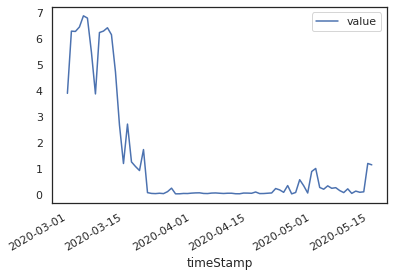

In [92]:
n[n['fips']==42091.0].plot.line(x='timeStamp',y='value');


## Google Mobility

https://www.google.com/covid19/mobility/index.html?hl=en

In [73]:
import random
url = 'https://www.gstatic.com/covid19/mobility/Global_Mobility_Report.csv?cachebust=57b4ac4fc{}40528e2a'.format(random.uniform(0,200))
gmobility=pd.read_csv(url)
gmobility.head()

,country_region_code,country_region,sub_region_1,sub_region_2,date,retail_and_recreation_percent_change_from_baseline,grocery_and_pharmacy_percent_change_from_baseline,parks_percent_change_from_baseline,transit_stations_percent_change_from_baseline,workplaces_percent_change_from_baseline,residential_percent_change_from_baseline
0,AE,United Arab Emirates,NaN,NaN,2020-02-15,0.0,4.0,5.0,0.0,2.0,1.0
1,AE,United Arab Emirates,NaN,NaN,2020-02-16,1.0,4.0,4.0,1.0,2.0,1.0
2,AE,United Arab Emirates,NaN,NaN,2020-02-17,-1.0,1.0,5.0,1.0,2.0,1.0
3,AE,United Arab Emirates,NaN,NaN,2020-02-18,-2.0,1.0,5.0,0.0,2.0,1.0
4,AE,United Arab Emirates,NaN,NaN,2020-02-19,-2.0,0.0,4.0,-1.0,2.0,1.0


# Reading Johns Hopkins

#### Read in Confirmed Cases

In [39]:
# 
url='https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_US.csv'
d=pd.read_csv(url)
d.head()

,UID,iso2,iso3,code3,FIPS,Admin2,Province_State,Country_Region,Lat,Long_,Combined_Key,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,...,4/9/20,4/10/20,4/11/20,4/12/20,4/13/20,4/14/20,4/15/20,4/16/20,4/17/20,4/18/20,4/19/20,4/20/20,4/21/20,4/22/20,4/23/20,4/24/20,4/25/20,4/26/20,4/27/20,4/28/20,4/29/20,4/30/20,5/1/20,5/2/20,5/3/20,5/4/20,5/5/20,5/6/20,5/7/20,5/8/20,5/9/20,5/10/20,5/11/20,5/12/20,5/13/20,5/14/20,5/15/20,5/16/20,5/17/20,5/18/20
0,16,AS,ASM,16,60.0,NaN,American Samoa,US,-14.2710,-170.1320,"American Samoa, US",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,316,GU,GUM,316,66.0,NaN,Guam,US,13.4443,144.7937,"Guam, US",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,128,130,133,133,133,133,135,135,136,136,136,136,136,136,139,141,141,141,141,141,141,145,145,145,145,145,145,149,149,151,151,151,151,152,152,152,154,154,154,154
2,580,MP,MNP,580,69.0,NaN,Northern Mariana Islands,US,15.0979,145.6739,"Northern Mariana Islands, US",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,11,11,11,11,11,11,13,13,13,14,14,14,14,14,14,14,14,14,14,14,14,14,14,14,14,14,14,15,15,15,16,16,19,19,19,19,19,21,21,21
3,630,PR,PRI,630,72.0,NaN,Puerto Rico,US,18.2208,-66.5901,"Puerto Rico, US",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,683,725,788,897,903,923,974,1043,1068,1118,1213,1252,1298,1252,1416,1276,1307,1371,1389,1400,1433,1539,1575,1757,1808,1843,1924,1968,2031,2156,2173,2198,2256,2299,2329,2427,2542,2589,2646,2710
4,850,VI,VIR,850,78.0,NaN,Virgin Islands,US,18.3358,-64.8963,"Virgin Islands, US",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,45,50,51,51,51,51,51,51,51,53,53,53,53,54,54,54,55,57,57,57,57,66,66,66,66,66,66,66,66,68,68,69,69,69,69,69,69,69,69,69


In [74]:
PERIODS = 7

c=d
cols = d.columns[10:11].tolist() + d.columns[11::].tolist()
cols
c=c[cols]
c=c.set_index('Combined_Key')
x=c.diff(axis=1,periods=PERIODS)
x=x.reset_index()
c=c.diff(axis=1)

c=c.reset_index()
c

,Combined_Key,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,2/20/20,2/21/20,2/22/20,2/23/20,2/24/20,2/25/20,2/26/20,2/27/20,2/28/20,2/29/20,...,4/9/20,4/10/20,4/11/20,4/12/20,4/13/20,4/14/20,4/15/20,4/16/20,4/17/20,4/18/20,4/19/20,4/20/20,4/21/20,4/22/20,4/23/20,4/24/20,4/25/20,4/26/20,4/27/20,4/28/20,4/29/20,4/30/20,5/1/20,5/2/20,5/3/20,5/4/20,5/5/20,5/6/20,5/7/20,5/8/20,5/9/20,5/10/20,5/11/20,5/12/20,5/13/20,5/14/20,5/15/20,5/16/20,5/17/20,5/18/20
0,"American Samoa, US",NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,"Guam, US",NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,7.0,2.0,3.0,0.0,0.0,0.0,2.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,3.0,2.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,2.0,0.0,0.0,0.0,1.0,0.0,0.0,2.0,0.0,0.0,0.0
2,"Northern Mariana Islands, US",NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,3.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0
3,"Puerto Rico, US",NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,63.0,42.0,63.0,109.0,6.0,20.0,51.0,69.0,25.0,50.0,95.0,39.0,46.0,-46.0,164.0,-140.0,31.0,64.0,18.0,11.0,33.0,106.0,36.0,182.0,51.0,35.0,81.0,44.0,63.0,125.0,17.0,25.0,58.0,43.0,30.0,98.0,115.0,47.0,57.0,64.0
4,"Virgin Islands, US",NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,5.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,2.0,0.0,0.0,0.0,9.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3256,"Central Utah, Utah, US",NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,15.0,2.0,0.0,3.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
3257,"Southeast Utah, Utah, US",NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6.0,1.0,0.0,0.0,0.0,1.0,3.0,1.0,1.0,0.0,1.0,-2.0,1.0,2.0,-4.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,-1.0,0.0,0.0,0.0,1.0,0.0,1.0
3258,"Southwest Utah, Utah, US",NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,66.0,4.0,0.0,0.0,6.0,5.0,2.0,4.0,2.0,2.0,2.0,5.0,3.0,2.0,8.0,8.0,2.0,7.0,4.0,6.0,17.0,9.0,6.0,-3.0,13.0,7.0,13.0,9.0,10.0,17.0
3259,"TriCounty, Utah, US",NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0

In [41]:
x.head()

,Combined_Key,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,2/20/20,2/21/20,2/22/20,2/23/20,2/24/20,2/25/20,2/26/20,2/27/20,2/28/20,2/29/20,...,4/9/20,4/10/20,4/11/20,4/12/20,4/13/20,4/14/20,4/15/20,4/16/20,4/17/20,4/18/20,4/19/20,4/20/20,4/21/20,4/22/20,4/23/20,4/24/20,4/25/20,4/26/20,4/27/20,4/28/20,4/29/20,4/30/20,5/1/20,5/2/20,5/3/20,5/4/20,5/5/20,5/6/20,5/7/20,5/8/20,5/9/20,5/10/20,5/11/20,5/12/20,5/13/20,5/14/20,5/15/20,5/16/20,5/17/20,5/18/20
0,"American Samoa, US",NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,"Guam, US",NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,46.0,46.0,40.0,21.0,20.0,12.0,14.0,7.0,6.0,3.0,3.0,3.0,3.0,1.0,4.0,5.0,5.0,5.0,5.0,5.0,5.0,6.0,4.0,4.0,4.0,4.0,4.0,8.0,4.0,6.0,6.0,6.0,6.0,7.0,3.0,3.0,3.0,3.0,3.0,3.0
2,"Northern Mariana Islands, US",NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,5.0,3.0,3.0,3.0,3.0,3.0,2.0,2.0,2.0,3.0,3.0,3.0,3.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,2.0,2.0,5.0,5.0,4.0,4.0,4.0,5.0,5.0,2.0
3,"Puerto Rico, US",NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,367.0,409.0,336.0,422.0,390.0,350.0,354.0,360.0,343.0,330.0,316.0,349.0,375.0,278.0,373.0,208.0,189.0,158.0,137.0,102.0,181.0,123.0,299.0,450.0,437.0,454.0,524.0,535.0,492.0,581.0,416.0,390.0,413.0,375.0,361.0,396.0,386.0,416.0,448.0,454.0
4,"Virgin Islands, US",NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,15.0,13.0,11.0,9.0,8.0,8.0,6.0,6.0,1.0,2.0,2.0,2.0,2.0,3.0,3.0,3.0,2.0,4.0,4.0,4.0,3.0,12.0,12.0,11.0,9.0,9.0,9.0,9.0,0.0,2.0,2.0,3.0,3.0,3.0,3.0,3.0,1.0,1.0,0.0,0.0


In [42]:
n=pd.melt(x, id_vars=['Combined_Key'], value_vars=x.columns[2::])
n.columns = ['Country/Region', 'timeStamp',  'value']
n['timeStamp'] = n['timeStamp'].apply(lambda x: datetime.strptime(x,'%m/%d/%y'))
n.head()

,Country/Region,timeStamp,value
0,"American Samoa, US",2020-01-23,NaN
1,"Guam, US",2020-01-23,NaN
2,"Northern Mariana Islands, US",2020-01-23,NaN
3,"Puerto Rico, US",2020-01-23,NaN
4,"Virgin Islands, US",2020-01-23,NaN


## N is smoother

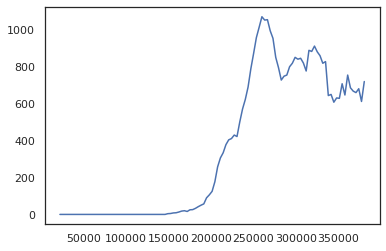

In [43]:

regions = ['Montgomery, Pennsylvania, US']
for region in regions:
  z= n[n['Country/Region'].str.find(region,0)==0]
  z['value'].plot.line(x='timeStamp',y='value');

In [44]:
m=pd.melt(c, id_vars=['Combined_Key'], value_vars=c.columns[2::])
m.columns = ['Country/Region', 'timeStamp',  'value']
m['timeStamp'] = m['timeStamp'].apply(lambda x: datetime.strptime(x,'%m/%d/%y'))
m.head()

,Country/Region,timeStamp,value
0,"American Samoa, US",2020-01-23,0.0
1,"Guam, US",2020-01-23,0.0
2,"Northern Mariana Islands, US",2020-01-23,0.0
3,"Puerto Rico, US",2020-01-23,0.0
4,"Virgin Islands, US",2020-01-23,0.0


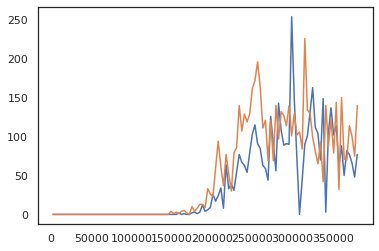

In [45]:
regions = ['Bucks, Pennsylvania, US','Montgomery, Pennsylvania, US']
for region in regions:
  z= m[m['Country/Region'].str.find(region,0)==0]
  z['value'].plot.line();

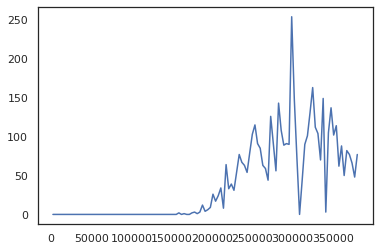

In [46]:
regions = ['Bucks, Pennsylvania, US']
for region in regions:
  m[m['Country/Region'].str.find(region,0)==0]['value'].plot.line();

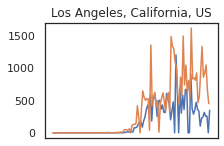

In [47]:
regions = ['Philadelphia, Pennsylvania, US']
regions = ['Potter, Texas, US']
regions = ['Dallas, Texas, US']
#regions = ['New York City, New York, US']
regions = ['Los Angeles, California, US']
regions = ['Philadelphia, Pennsylvania, US','Los Angeles, California, US']
fig=plt.figure()
for region in regions:
  m[m['Country/Region'].str.find(region,0)==0]['value'].plot.line(title=region,xticks=[],ax=fig.add_axes((0.05,0.5,0.4,0.4)));
plt.show()

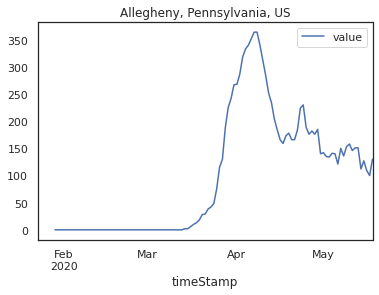

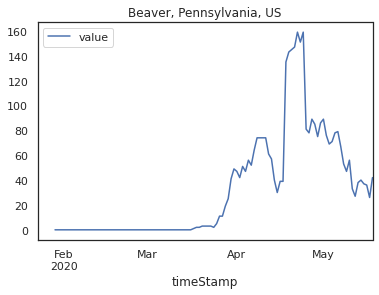

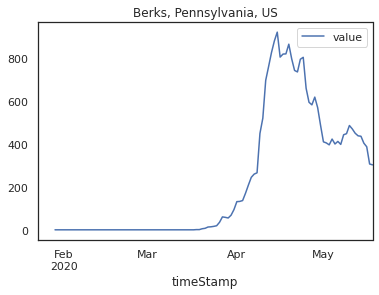

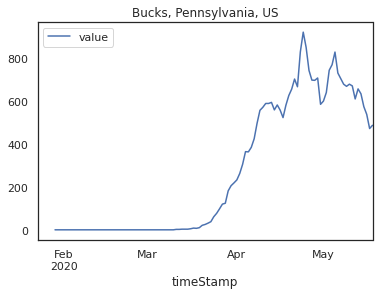

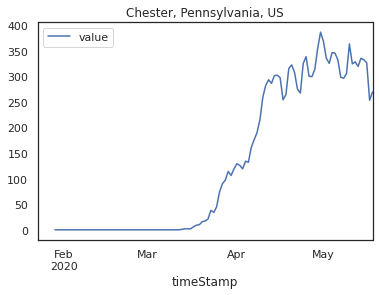

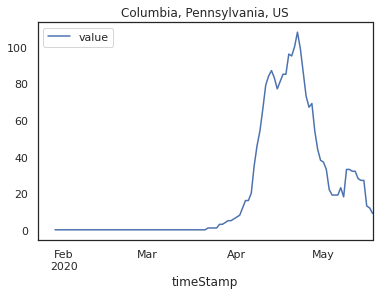

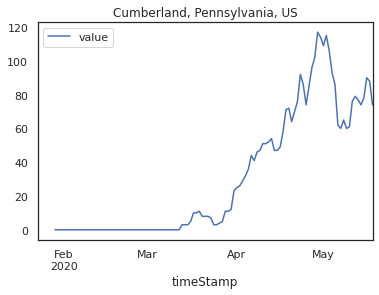

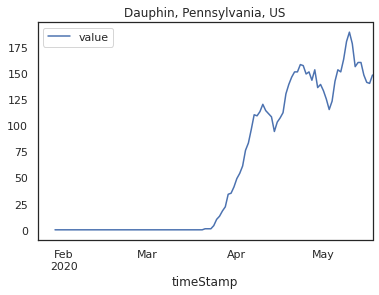

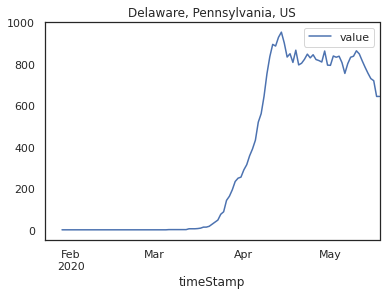

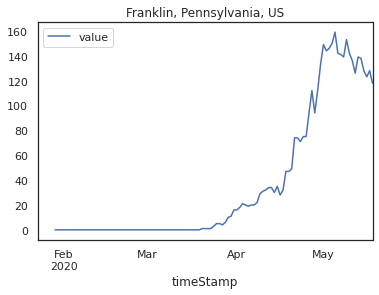

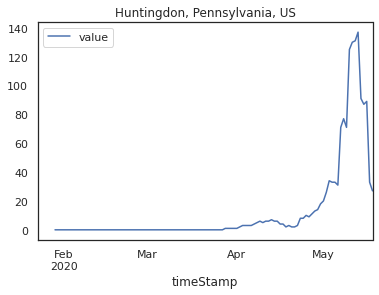

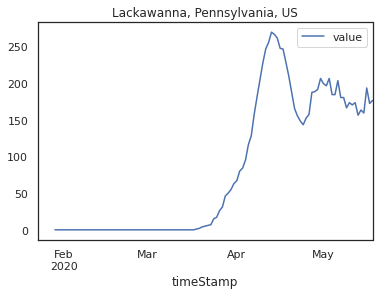

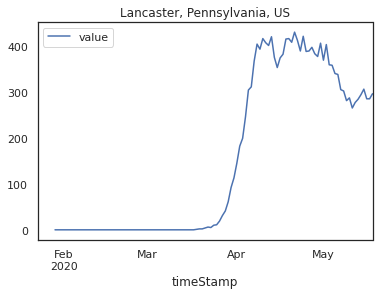

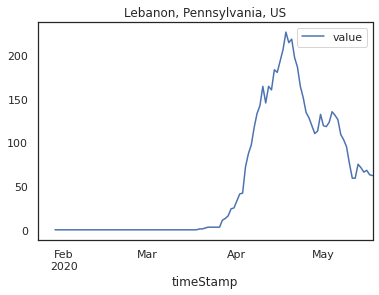

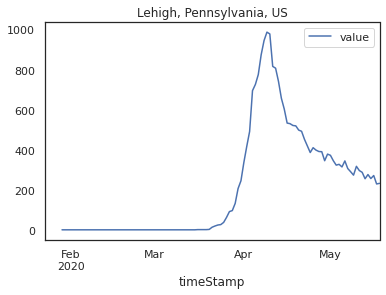

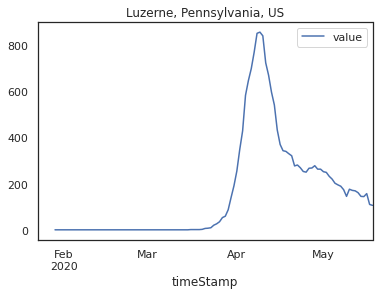

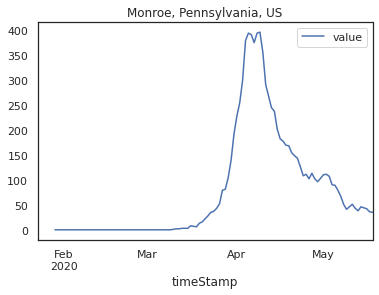

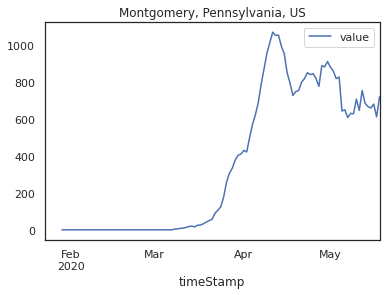

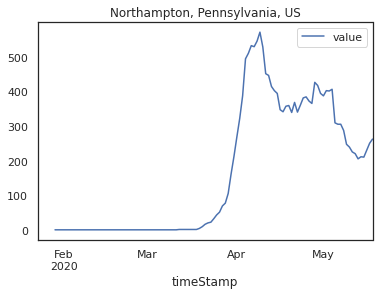

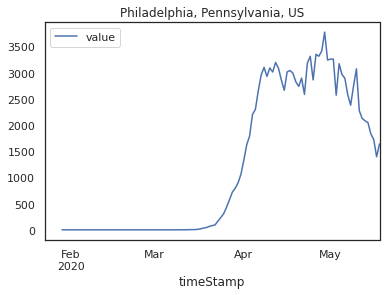

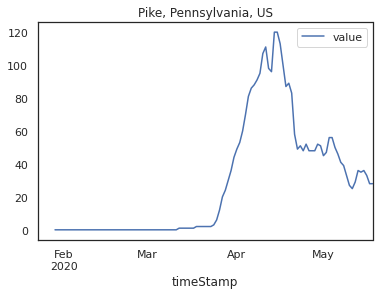

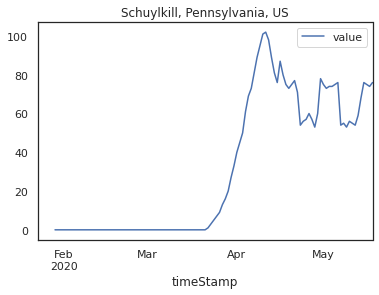

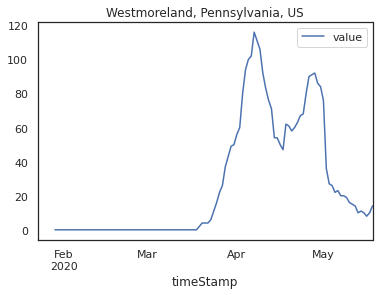

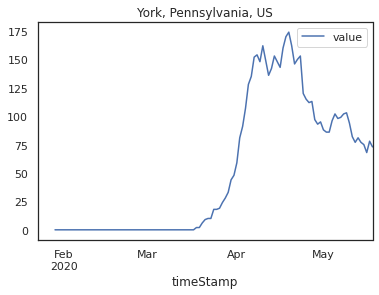

In [48]:
import matplotlib.pyplot as plt


t = n[(n['Country/Region'].str.find('Pennsylvania',0)!= -1)]
my_list = t[t['value']>100]['Country/Region'].unique()
t=t[t['Country/Region'].isin(my_list)]

for title, group in t.groupby('Country/Region'):
    group.plot(x='timeStamp', y='value', title=title)

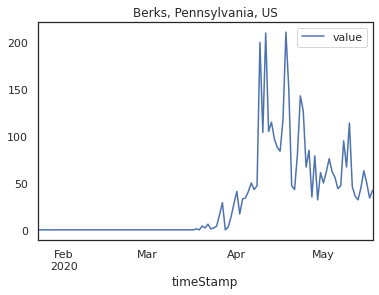

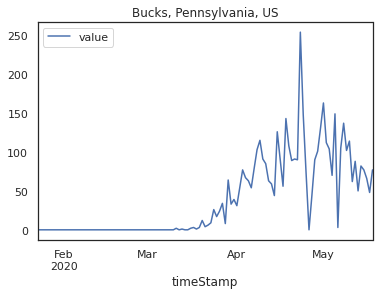

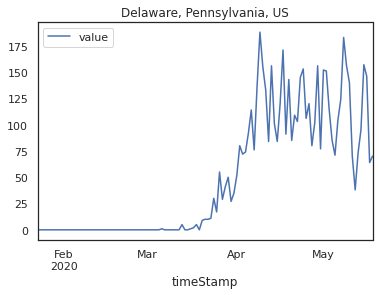

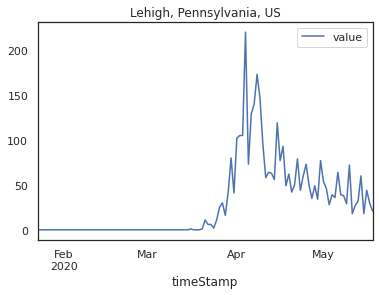

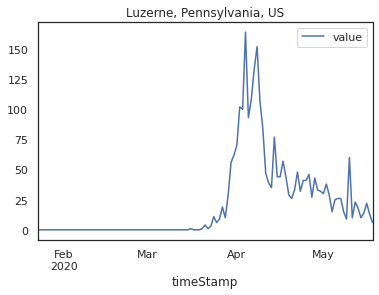

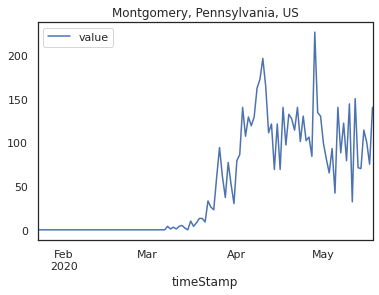

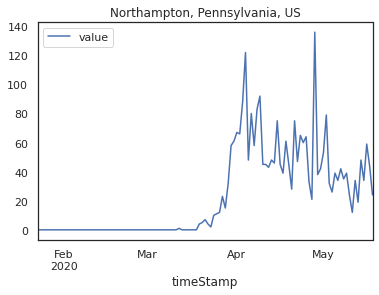

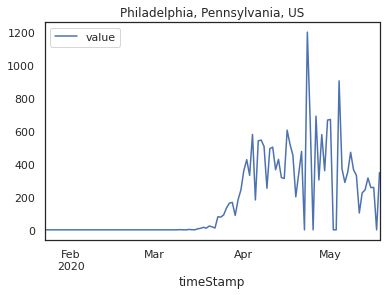

In [49]:
import matplotlib.pyplot as plt


t = m[(m['Country/Region'].str.find('Pennsylvania',0)!= -1)]
my_list = t[t['value']>100]['Country/Region'].unique()
t=t[t['Country/Region'].isin(my_list)]

for title, group in t.groupby('Country/Region'):
    group.plot(x='timeStamp', y='value', title=title)

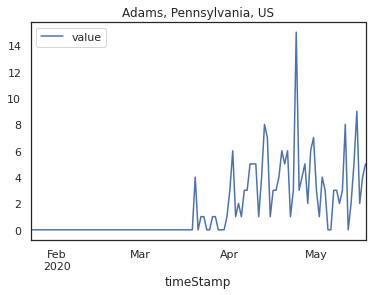

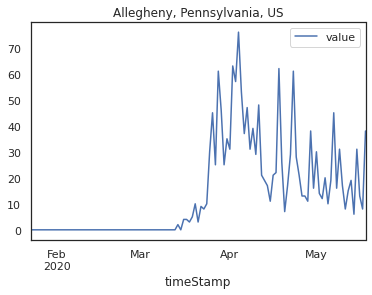

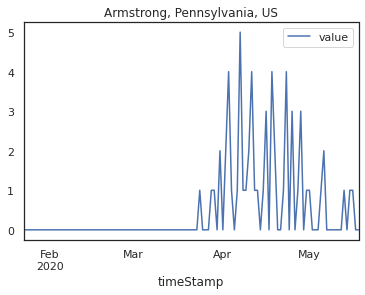

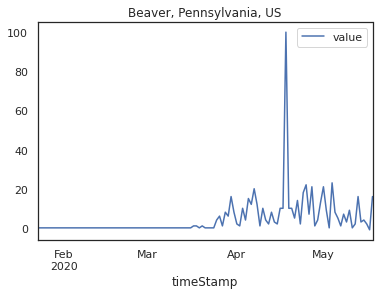

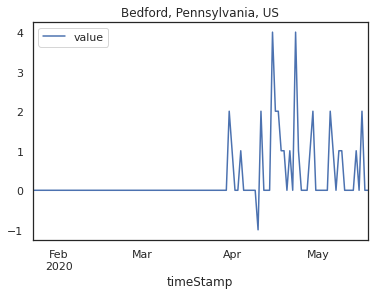

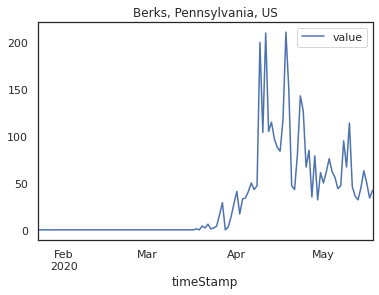

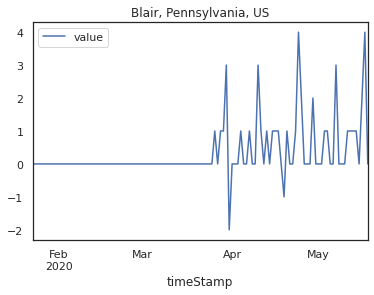

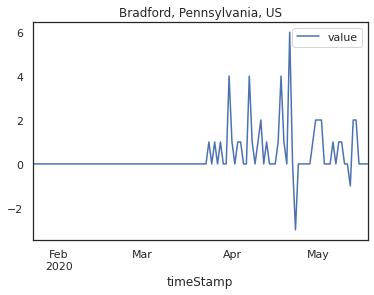

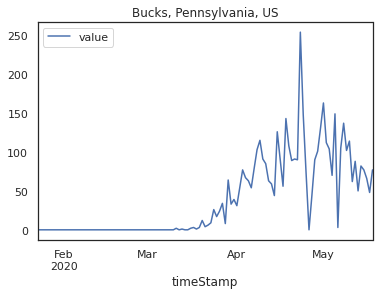

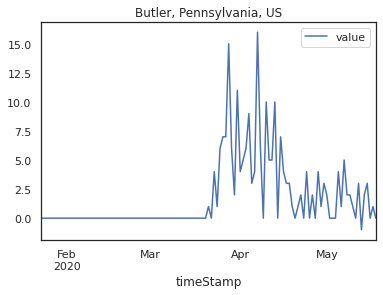

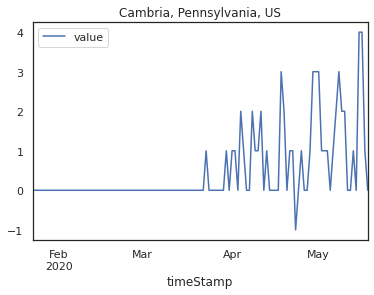

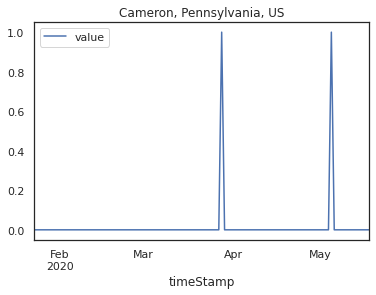

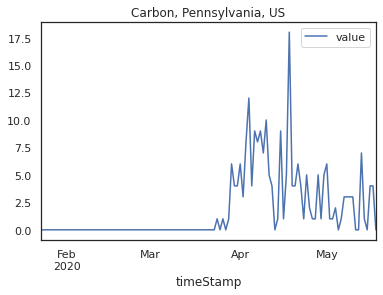

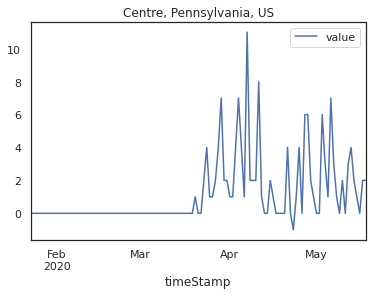

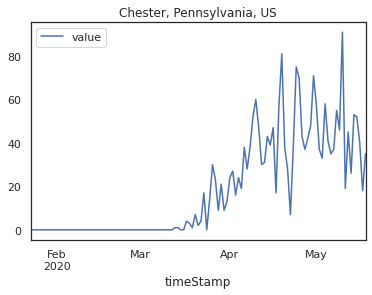

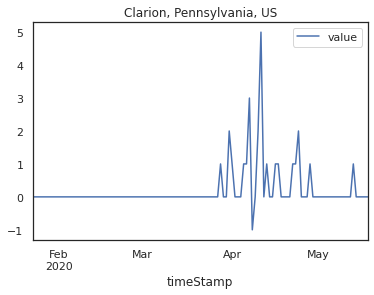

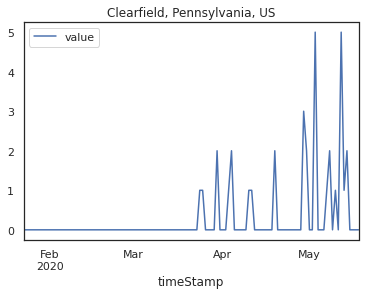

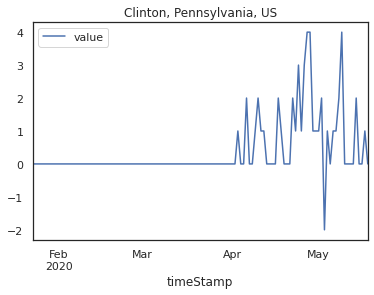

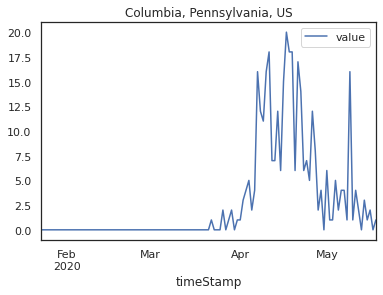

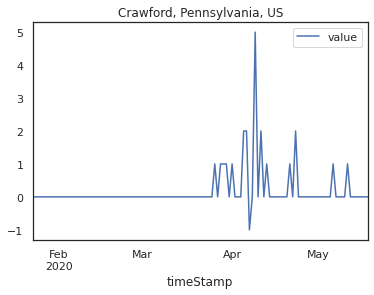

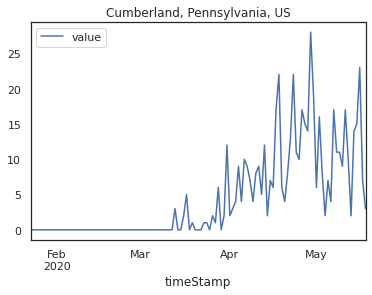

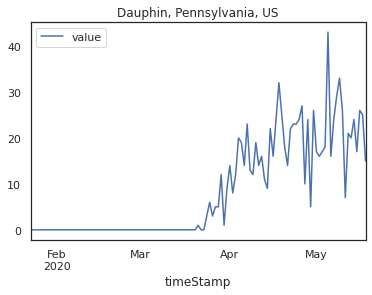

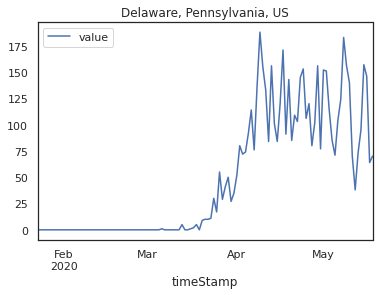

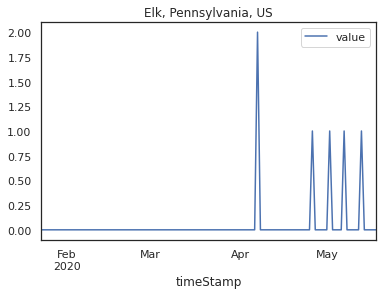

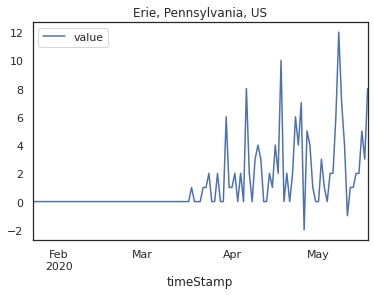

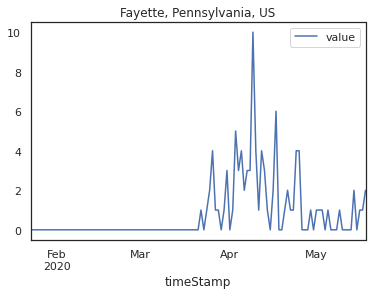

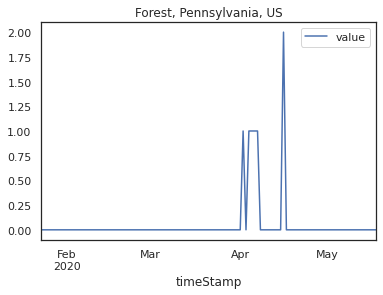

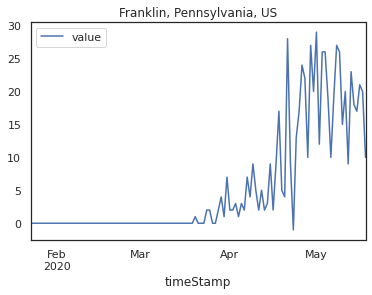

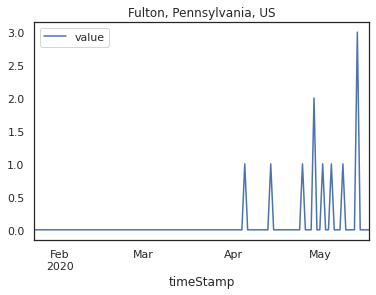

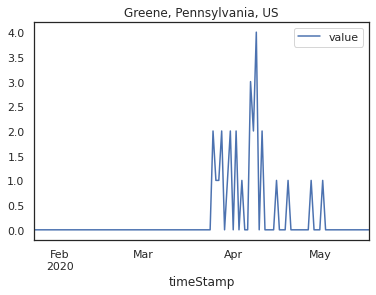

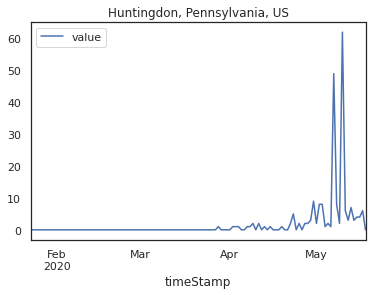

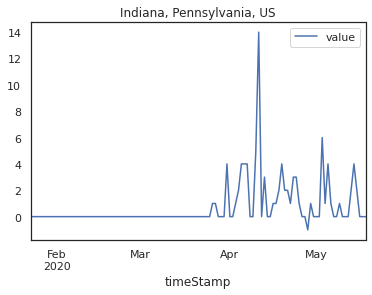

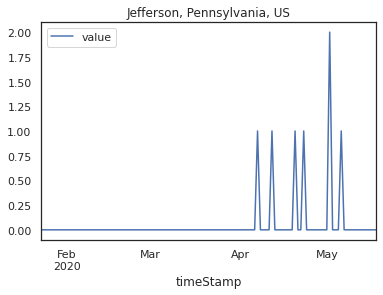

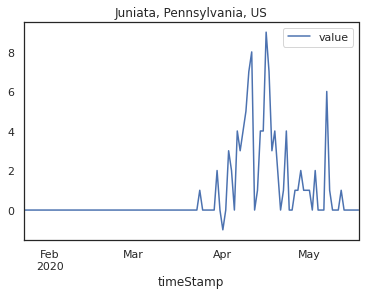

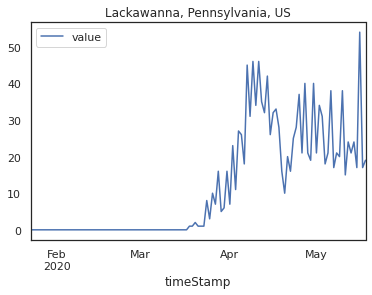

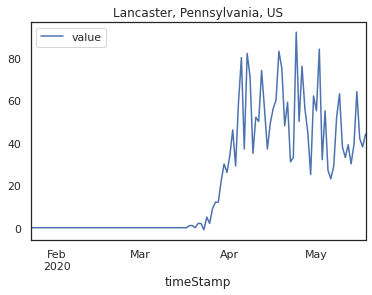

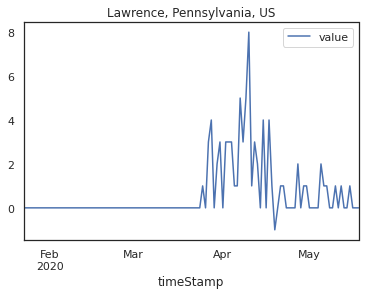

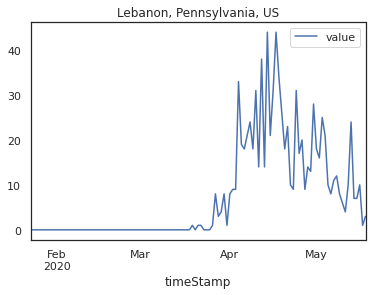

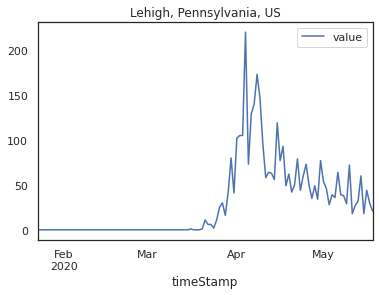

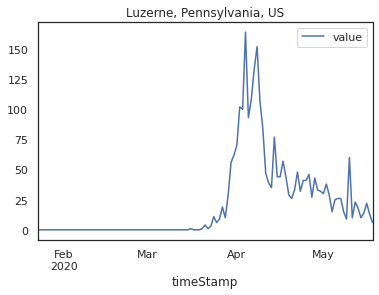

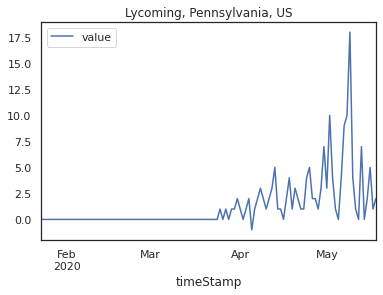

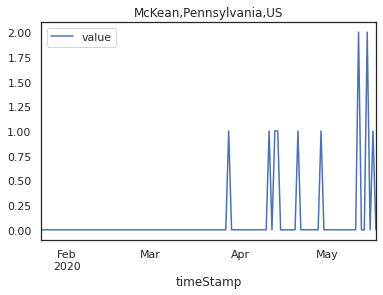

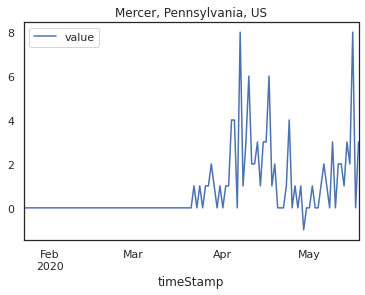

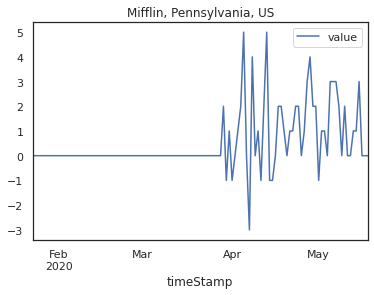

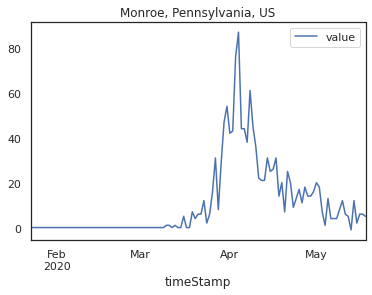

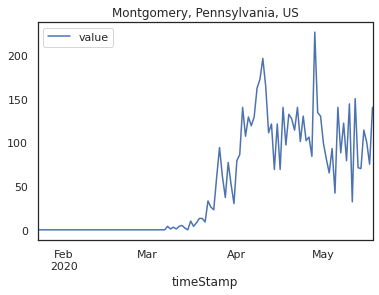

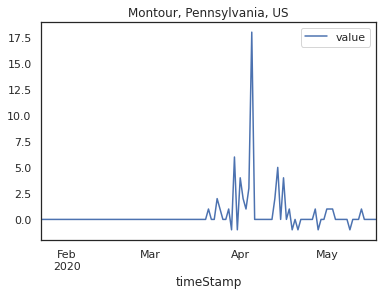

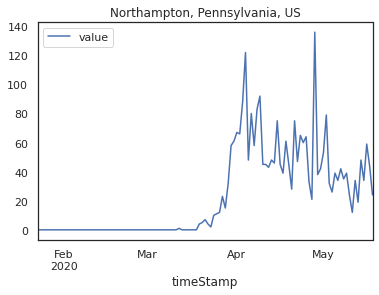

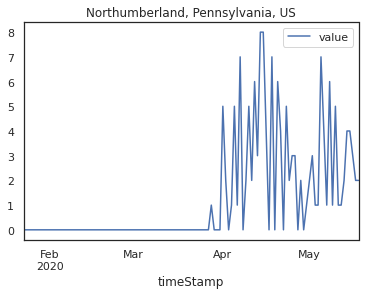

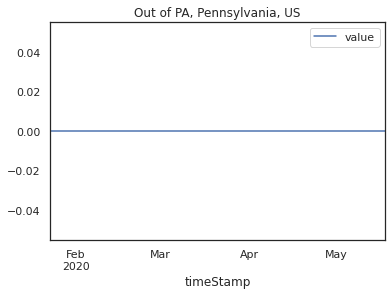

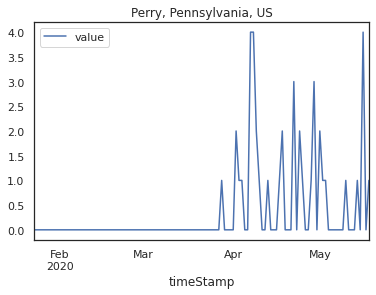

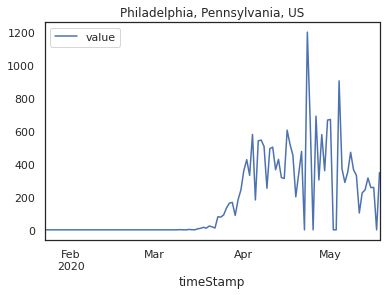

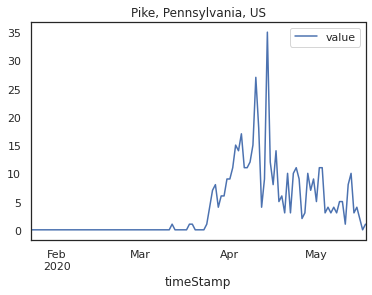

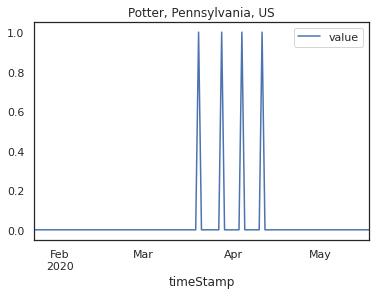

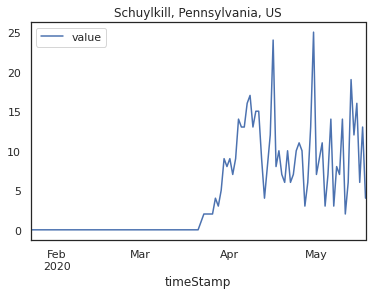

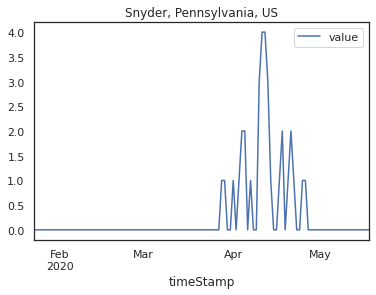

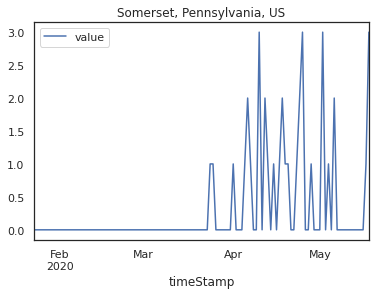

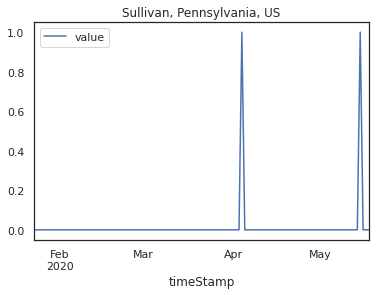

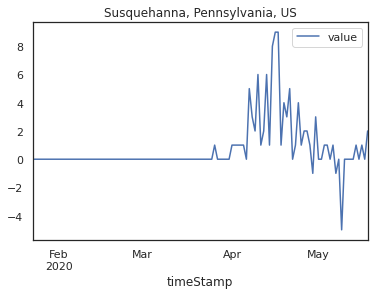

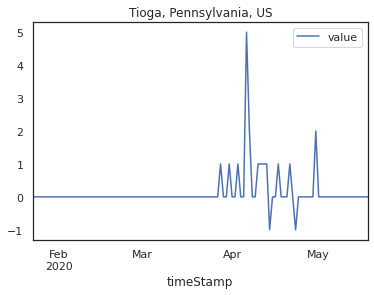

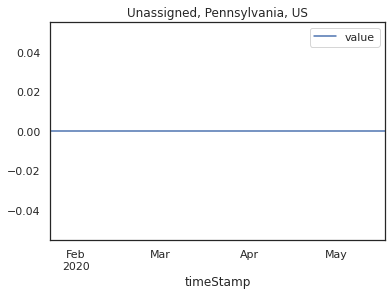

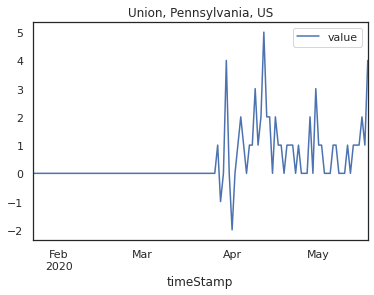

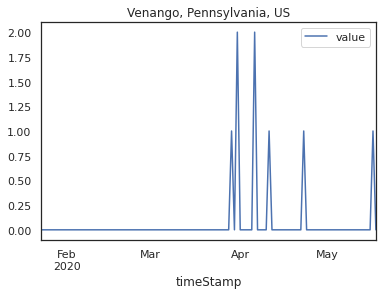

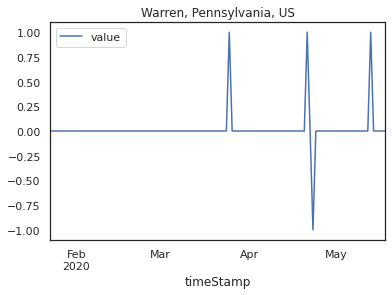

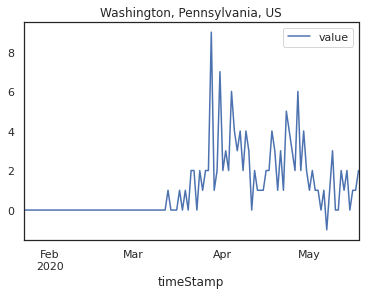

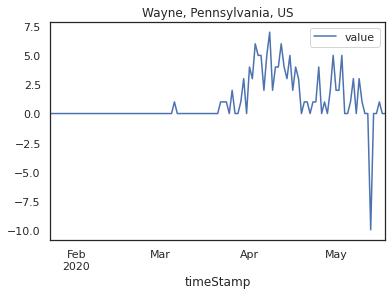

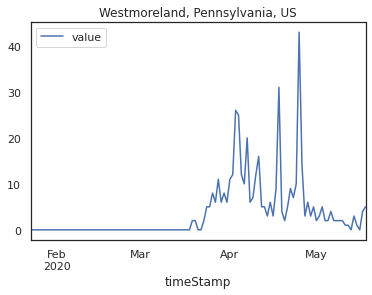

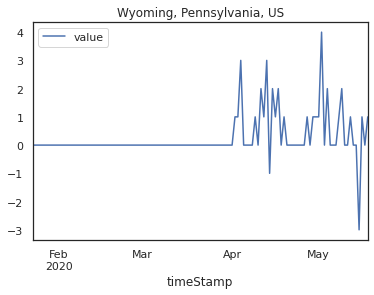

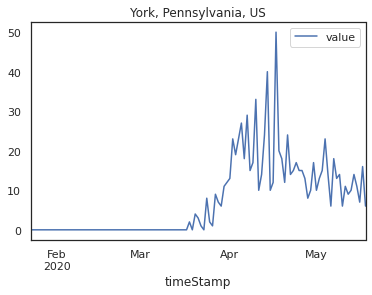

In [50]:
import matplotlib.pyplot as plt
t = m[(m['Country/Region'].str.find('Pennsylvania',0)!= -1)]
for title, group in t.groupby('Country/Region'):
    group.plot(x='timeStamp', y='value', title=title)

In [51]:
delta_days = 20

from datetime import date, timedelta
dt = date.today() - timedelta(delta_days)
dt.strftime("%Y-%m-%d")

'2020-04-29'

In [52]:
penn = m[m['Country/Region'].str.contains('Pennsylvania', regex=False)]
penn = m
penn = penn[penn['timeStamp'] >= dt.strftime("%Y-%m-%d") ]
penn['timeStamp'].describe()

count                   65220
unique                     20
top       2020-05-05 00:00:00
freq                     3261
first     2020-04-29 00:00:00
last      2020-05-18 00:00:00
Name: timeStamp, dtype: object

In [0]:

pp = penn.pivot(index='Country/Region', columns='timeStamp', values='value')
#sns.heatmap(pp, annot=True)

In [54]:
pp.diff(axis=1)

timeStamp,2020-04-29,2020-04-30,2020-05-01,2020-05-02,2020-05-03,2020-05-04,2020-05-05,2020-05-06,2020-05-07,2020-05-08,2020-05-09,2020-05-10,2020-05-11,2020-05-12,2020-05-13,2020-05-14,2020-05-15,2020-05-16,2020-05-17,2020-05-18
Country/Region,,,,,,,,,,,,,,,,,,,,
"Abbeville, South Carolina, US",NaN,2.0,-2.0,0.0,2.0,-2.0,0.0,0.0,1.0,-1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,-1.0
"Acadia, Louisiana, US",NaN,0.0,3.0,-3.0,1.0,-1.0,2.0,2.0,-2.0,-2.0,9.0,-12.0,7.0,-4.0,-1.0,9.0,22.0,-27.0,3.0,53.0
"Accomack, Virginia, US",NaN,29.0,4.0,11.0,-3.0,-22.0,-21.0,0.0,26.0,-30.0,33.0,-21.0,4.0,-10.0,9.0,33.0,7.0,-35.0,0.0,-18.0
"Ada, Idaho, US",NaN,9.0,1.0,14.0,-24.0,5.0,-2.0,1.0,0.0,-4.0,10.0,-8.0,4.0,-1.0,-5.0,15.0,-15.0,14.0,-14.0,7.0
"Adair, Iowa, US",NaN,0.0,0.0,0.0,0.0,0.0,1.0,0.0,-1.0,0.0,0.0,0.0,0.0,0.0,1.0,-1.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
"Yuma, Arizona, US",NaN,8.0,-9.0,-4.0,9.0,8.0,-17.0,19.0,-5.0,-3.0,6.0,-2.0,-7.0,0.0,68.0,-74.0,23.0,28.0,-53.0,80.0
"Yuma, Colorado, US",NaN,-1.0,1.0,-2.0,2.0,-1.0,0.0,0.0,1.0,-1.0,0.0,1.0,-1.0,0.0,0.0,0.0,1.0,-1.0,0.0,-1.0
"Zapata, Texas, US",NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [55]:
t = pp.diff(axis=1).reset_index()
md=pd.melt(t, id_vars=['Country/Region'], value_vars=t.columns[2::])

md.head()

,Country/Region,timeStamp,value
0,"Abbeville, South Carolina, US",2020-04-30,2.0
1,"Acadia, Louisiana, US",2020-04-30,0.0
2,"Accomack, Virginia, US",2020-04-30,29.0
3,"Ada, Idaho, US",2020-04-30,9.0
4,"Adair, Iowa, US",2020-04-30,0.0


In [56]:
r = md.groupby(['Country/Region', pd.Grouper(key='timeStamp', freq='5d')]).describe()
r = r.reset_index()
r.columns = r.columns.get_level_values(0)
new_index = ['Country/Region', 'timeStamp', 'count',	'mean',	'std',	'min',	'25%',	'50%',	'75%',	'max']
r.columns = new_index

r[r['max'] > 100]

,Country/Region,timeStamp,count,mean,std,min,25%,50%,75%,max
493,"Baltimore City, Maryland, US",2020-05-05,5.0,35.00,103.853262,-55.0,-39.00,-19.0,106.00,182.0
497,"Baltimore, Maryland, US",2020-05-05,5.0,-34.60,115.318255,-165.0,-127.00,-34.0,38.00,115.0
498,"Baltimore, Maryland, US",2020-05-10,5.0,31.20,71.099930,-39.0,6.00,17.0,21.00,151.0
771,"Bergen, New Jersey, US",2020-05-15,4.0,42.00,109.010703,-64.0,-28.75,23.5,94.25,185.0
808,"Bexar, Texas, US",2020-04-30,5.0,-6.40,83.377455,-108.0,-67.00,5.0,35.00,103.0
811,"Bexar, Texas, US",2020-05-15,4.0,-8.50,118.798148,-144.0,-61.50,-17.0,36.00,144.0
1140,"Broward, Florida, US",2020-04-30,5.0,4.00,83.868945,-78.0,-58.00,4.0,16.00,136.0
1217,"Bucks, Pennsylvania, US",2020-05-05,5.0,6.40,100.006500,-146.0,-35.00,32.0,79.00,102.0
1281,"Burlington, New Jersey, US",2020-05-05,5.0,8.60,79.226258,-79.0,-68.00,36.0,50.00,104.0
1477,"Camden, New Jersey, US",2020-05-05,5.0,7.80,93.734732,-122.0,-32.00,-1.0,78.00,116.0


In [57]:
r[r['Country/Region']=='Montgomery, Pennsylvania, US']

,Country/Region,timeStamp,count,mean,std,min,25%,50%,75%,max
7992,"Montgomery, Pennsylvania, US",2020-04-30,5.0,-8.2,22.387497,-31.0,-18.00,-16.0,-4.00,28.0
7993,"Montgomery, Pennsylvania, US",2020-05-05,5.0,-2.8,66.848336,-52.0,-51.00,-43.0,34.00,98.0
7994,"Montgomery, Pennsylvania, US",2020-05-10,5.0,-1.8,96.071328,-112.0,-79.00,-1.0,65.00,118.0
7995,"Montgomery, Pennsylvania, US",2020-05-15,4.0,17.5,43.806392,-25.0,-16.75,15.0,49.25,65.0


In [58]:
r.head()

,Country/Region,timeStamp,count,mean,std,min,25%,50%,75%,max
0,"Abbeville, South Carolina, US",2020-04-30,5.0,0.0,2.000000,-2.0,-2.00,0.0,2.00,2.0
1,"Abbeville, South Carolina, US",2020-05-05,5.0,0.0,0.707107,-1.0,0.00,0.0,0.00,1.0
2,"Abbeville, South Carolina, US",2020-05-10,5.0,0.0,0.000000,0.0,0.00,0.0,0.00,0.0
3,"Abbeville, South Carolina, US",2020-05-15,4.0,0.0,0.816497,-1.0,-0.25,0.0,0.25,1.0
4,"Acadia, Louisiana, US",2020-04-30,5.0,0.0,2.236068,-3.0,-1.00,0.0,1.00,3.0


In [59]:
t=md.groupby(['Country/Region', pd.Grouper(key='timeStamp', freq='3d')]).sum()
t=t.reset_index()
total = t.groupby(['Country/Region']).sum().reset_index()
total[total['Country/Region']=='Montgomery, Pennsylvania, US']

,Country/Region,value
1998,"Montgomery, Pennsylvania, US",6.0


In [60]:
pd.set_option('display.max_rows', 1000)
ts = total.sort_values('value',ascending=False)
ts[ts['value']>100].head(300)

,Country/Region,value
2954,"Unassigned, Rhode Island, US",323.0
1920,"Michigan Department of Corrections (MDOC), Mic...",323.0
891,"Essex, New Jersey, US",253.0
715,"Dallas, Texas, US",224.0
2925,"Unassigned, Georgia, US",210.0
2936,"Unassigned, Massachusetts, US",165.0
2942,"Unassigned, Nebraska, US",162.0
1251,"Hennepin, Minnesota, US",142.0
2496,"Riverside, California, US",127.0
1919,"Miami-Dade, Florida, US",110.0


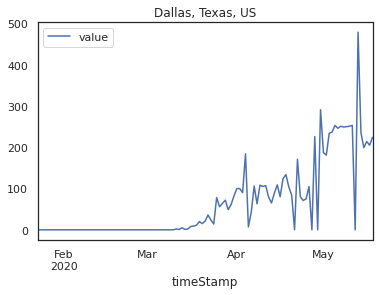

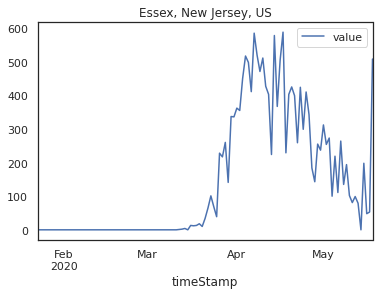

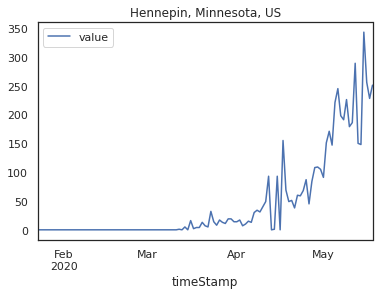

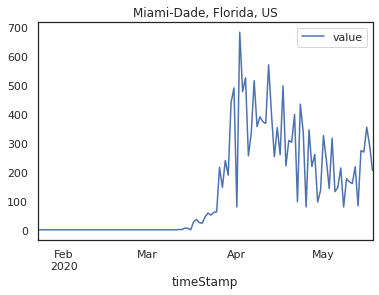

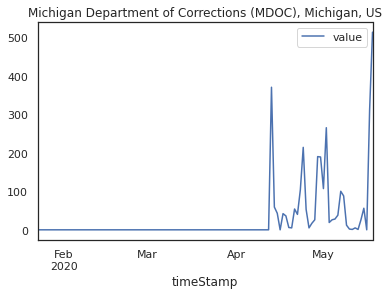

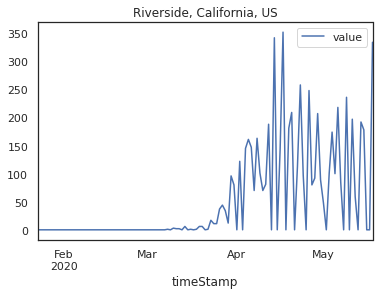

In [61]:

my_list = ts[ts['value']>100]['Country/Region'].tolist()[0:300]
bad_data = m[m['value']<0]['Country/Region'].unique().tolist()

t=m[m['Country/Region'].isin(my_list)]
t = t[~t['Country/Region'].isin(bad_data)]




t=m[m['Country/Region'].isin(my_list)]
t=t[~t['Country/Region'].isin(bad_data)]

for title, group in t.groupby('Country/Region'):
    group.plot(x='timeStamp', y='value', title=title)